**#Loan Repayment Dataset - EDA,Normalization, Upsampling minority class, Building model using Decision Tree, Random Forest,Logistic regression**

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import statistics as stat
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
sns.set_style('darkgrid')
from sklearn.metrics import classification_report,confusion_matrix

**Get the Data**

In [71]:
loans=pd.read_csv('loan_data.csv')

**Check out the info(), head(), and describe() methods**

In [73]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [74]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [75]:
#Changing categorical data to numeric
loans = pd.get_dummies(loans)

In [76]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


**Exploratory Data Analysis**

**##Dealing withf Categorical Features**

***#Normalization***
**#checking out dist plot**

**#int rate **

C:\Users\Raja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.16


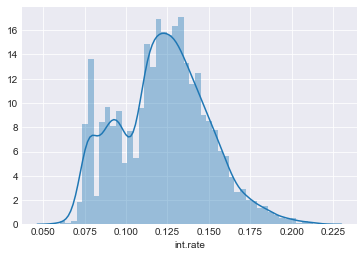

In [77]:
sns.distplot(loans['int.rate'])
print(round(skew(loans['int.rate']),2)) #0.16

**#installment**

C:\Users\Raja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.91


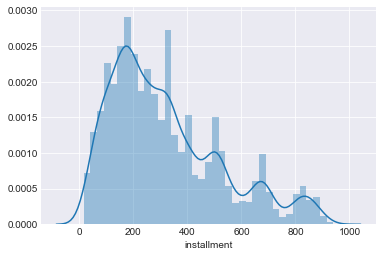

In [36]:
sns.distplot(loans['installment'])
print(round(skew(loans['installment']),2)) #0.91
loans['installment'] = np.sqrt(loans['installment'])

0.28


C:\Users\Raja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


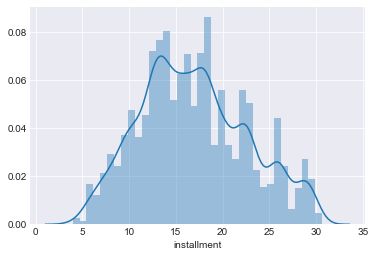

In [37]:
print(round(skew(loans['installment']),2))#0.28
sns.distplot(loans['installment'])

**#dti**

C:\Users\Raja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.02


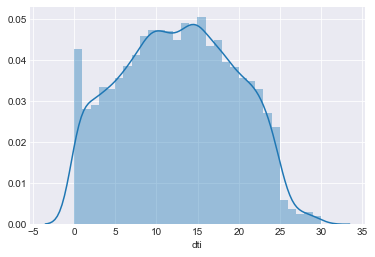

In [38]:
sns.distplot(loans['dti'])
print(round(skew(loans['dti']),2)) #0.02

**#fico**

C:\Users\Raja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.47


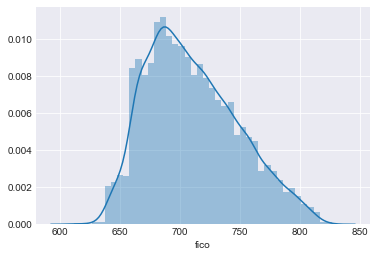

In [39]:
sns.distplot(loans['fico'])
print(round(skew(loans['fico']),2)) #0.47

C:\Users\Raja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.36


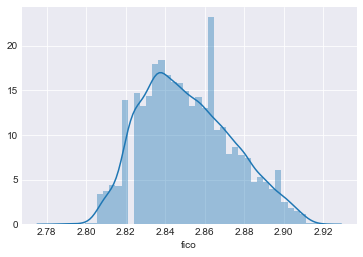

In [40]:
loans['fico'] = np.log10(loans['fico'])
sns.distplot(loans['fico'])
print(round(skew(loans['fico']),2)) #0.36

**#days.with.cr.line**

C:\Users\Raja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1.16


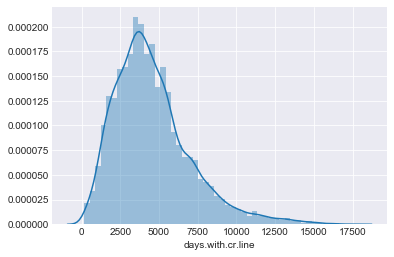

In [41]:
sns.distplot(loans['days.with.cr.line'])
print(round(skew(loans['days.with.cr.line']),2))#1.16

In [78]:
loans['days.with.cr.line'] = np.sqrt(loans['days.with.cr.line'])
print(round(skew(loans['days.with.cr.line']),2))#0.27

0.27


**#revol.bal**

C:\Users\Raja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


11.16


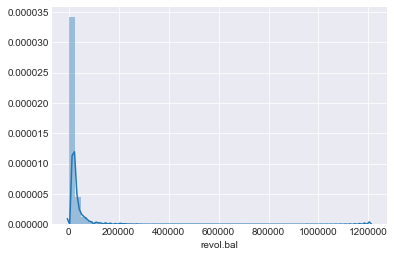

In [44]:
sns.distplot(loans['revol.bal'])
print(round(skew(loans['revol.bal']),2))#11.16

2.23


C:\Users\Raja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


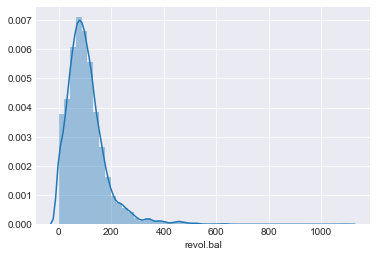

In [16]:
loans['revol.bal'] = np.sqrt(loans['revol.bal'])
print(round(skew(loans['revol.bal']),2))#2.23
sns.distplot(loans['revol.bal'])

**# setting up testing and training sets**

In [79]:
from sklearn.model_selection import train_test_split
y = loans['not.fully.paid']
X = loans.drop('not.fully.paid',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

**#Upsampling Minority class**

In [80]:
from sklearn.utils import resample

**# concatenate our training data back together**

In [81]:
X = pd.concat([X_train, y_train], axis=1)

In [82]:
paid= X[X['not.fully.paid']==0]
not_paid= X[X['not.fully.paid']==1]

**# upsample minority**

In [83]:
loans_upsampled = resample(not_paid,
                          replace=True, # sample with replacement
                          n_samples=len(paid), # match number in majority class
                          random_state=27) # reproducible results

**# combine majority and upsampled minority**

In [84]:
upsampled = pd.concat([paid, loans_upsampled])

**# check new class counts**

In [85]:
upsampled['not.fully.paid'].value_counts()

1    6048
0    6048
Name: not.fully.paid, dtype: int64

**Training the Logistic regression model**

In [86]:
y_train = upsampled['not.fully.paid']
X_train = upsampled.drop('not.fully.paid', axis=1)

In [87]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**#prediction**

In [88]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.88      0.64      0.74      1997
          1       0.24      0.57      0.34       398

avg / total       0.78      0.63      0.68      2395



In [89]:
accuracy_score(y_test, predictions)
print(confusion_matrix(y_test,predictions))

[[1281  716]
 [ 170  228]]


**Training Decision tree Model**

In [90]:
y_train = upsampled['not.fully.paid']
X_train = upsampled.drop('not.fully.paid', axis=1)

In [91]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**#Prediction**

In [92]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.85      0.84      1997
          1       0.20      0.19      0.19       398

avg / total       0.73      0.74      0.74      2395



In [59]:
print(confusion_matrix(y_test,predictions))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)


[[1692  305]
 [ 322   76]]


0.7382045929018789

**#Training Random Forest model**

In [60]:
y_train = upsampled['not.fully.paid']
X_train = upsampled.drop('not.fully.paid', axis=1)

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
#Fit the model
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**#prediction**

In [66]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.99      0.91      1997
          1       0.51      0.05      0.09       398

avg / total       0.79      0.83      0.77      2395



In [67]:
print(confusion_matrix(y_test,predictions))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

[[1978   19]
 [ 378   20]]


0.8342379958246346